In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.style.use('Solarize_Light2')
from astropy import units as u
import astropy.coordinates as coord
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs
import seaborn as sns
import hdbscan
import math


mpl.rcParams['figure.dpi'] = 150


In [87]:
blobs, labels = make_blobs(n_samples=2000, n_features=10) # 10 features
pd.DataFrame(blobs).head() # show the first 5 rows

clusterer = hdbscan.HDBSCAN()

def healpix(sourceID, level):
    pixel = math.floor(sourceID /(2**35 * 4**(12-level)))
    return pixel

def parallax(mas):
    arcsec = mas/1000
    return 1/arcsec


parallax(1.1)

healpix(3094113406614578432, 5)


5496

In [88]:
clusterer.fit(blobs) # do the clustering algorithm

#clusterer stores the results of the clusters in the labels_ attribute

clusterer.labels_ # show the labels of the clusters
# This gives an array of integers, where each integer is the cluster number of the corresponding row in the input data

cluster_amount = clusterer.labels_.max() +1 # number of clusters

cluster_amount
#data samples that are not assigned to a cluster get label -1   



3

In [89]:
membership_score = clusterer.probabilities_ # membership score of each data point to the cluster it is assigned to ranging from 0 to 1. 
# A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score)
# while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core).

membership_score

array([0.92717622, 1.        , 0.81677981, ..., 1.        , 0.55403533,
       0.69594504])

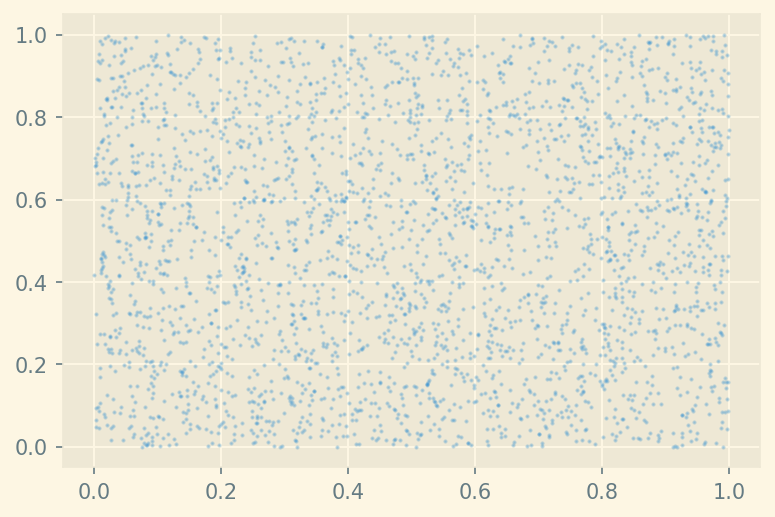

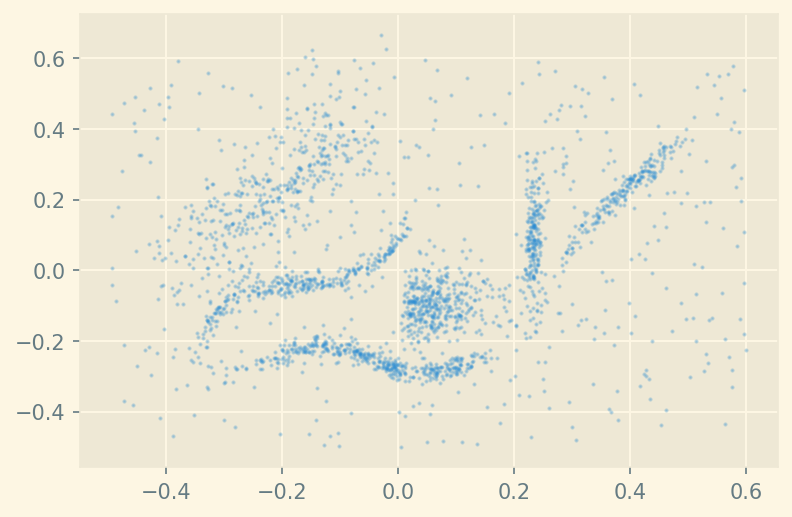

In [90]:
#//generate 3000 random datapoints in 2d

data = np.load('Data\\clusterable_data.npy')
randomdata = np.random.rand(3000,2)
plt.plot(randomdata[:,0], randomdata[:,1], 'o', markersize=1, alpha=0.25, linewidth = 0)
plt.show()

plt.plot(*data.T, 'o', markersize=1, alpha=0.25, linewidth = 0)
plt.show()


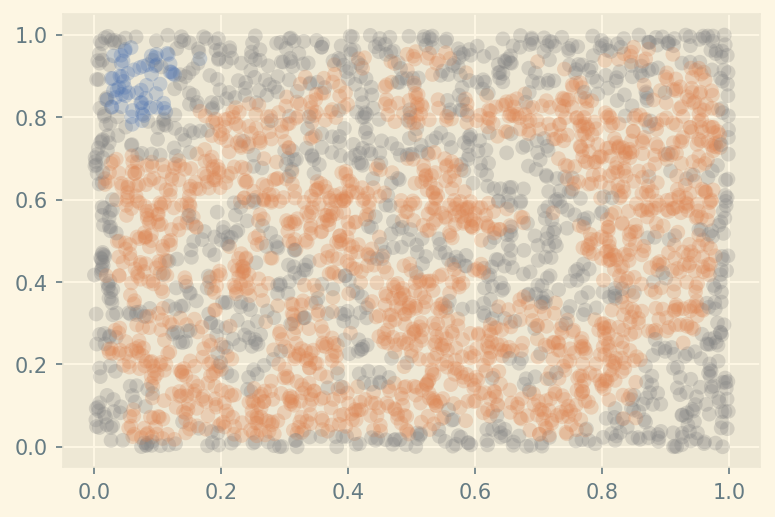

In [91]:

randclusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(randomdata)
color_palette = sns.color_palette('deep', 77)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in randclusterer.labels_]

cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, randclusterer.probabilities_)]

plt.scatter(randomdata[:,0], randomdata[:,1], s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)



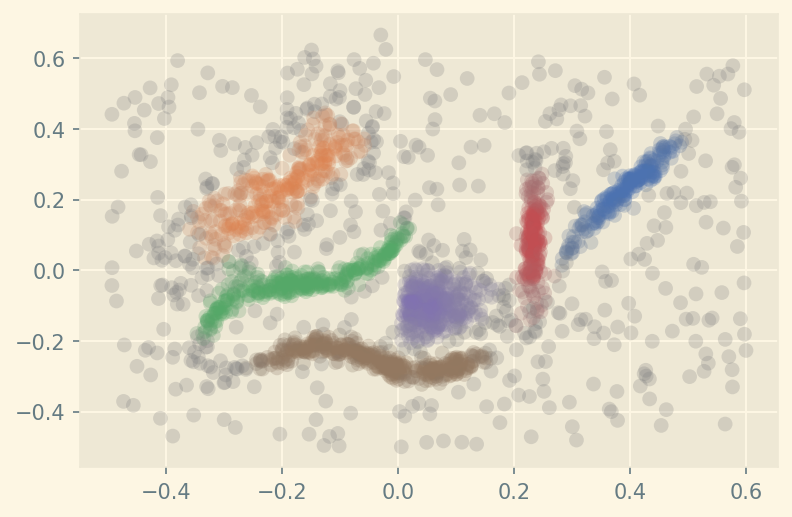

In [92]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

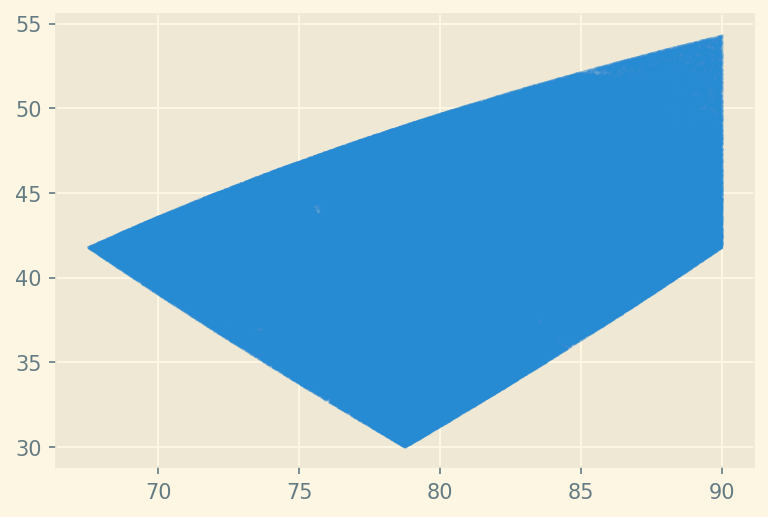

array(['COIN-Gaia_13', 'Platais_10', 'UBC_13', 'UBC_14', 'UBC_21',
       'UPK_495', 'UPK_533', 'UPK_654'], dtype=object)

In [131]:
coindata = pd.read_csv('Data\\COIN_results.csv')

members = pd.read_csv('Data\\inner_members.csv')
                                                
#coindata = coindata[coindata['phot_g_mean_mag'] <= 12]
 
plt.plot(coindata['ra'], coindata['dec'], 'o', markersize=0.1, alpha=0.25, linewidth = 0)
plt.show()
members['Cluster'].unique()

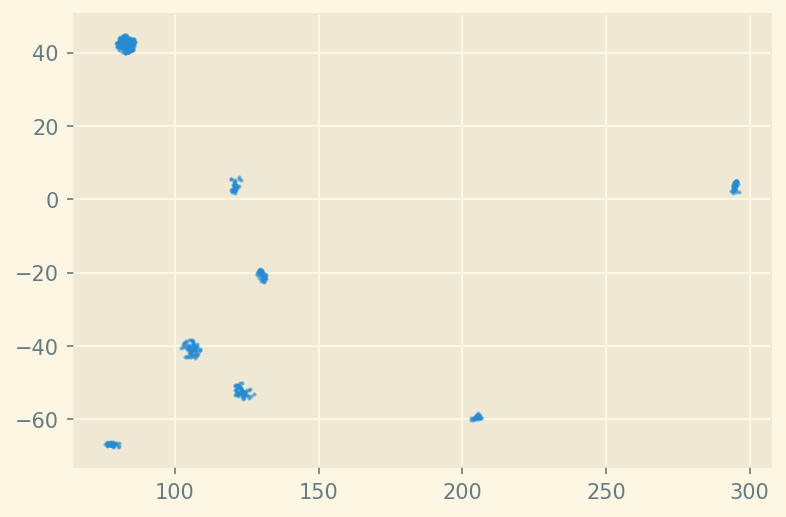

,RAdeg,DEdeg,Source,GLON,GLAT,parallax,e_Plx,pmRA,e_pmRA,pmDE,...,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,o_Gmag,Gmag,BP-RP,Proba,Cluster
347,120.052701,2.034369,3087940546476275200,219.095919,16.206330,1.563964,0.044357,-7.576945,0.072208,-1.022671,...,0.365001,-0.014077,0.524026,-0.246001,-0.353352,303,15.140053,1.138148,1.0,UBC_13
348,120.646430,2.288490,3087960646923284096,219.148854,16.849769,1.580914,0.046134,-7.695823,0.074602,-1.053939,...,0.159950,0.224402,0.468128,-0.251197,-0.352087,303,11.679918,0.345138,1.0,UBC_13
349,119.939216,2.337878,3087999198549348864,218.761111,16.246752,1.602920,0.026500,-7.655927,0.044547,-1.321625,...,0.341717,0.138259,0.348007,-0.234978,-0.107977,296,13.096788,0.685271,1.0,UBC_13
350,120.625223,2.417138,3087971229722455808,219.019515,16.890752,1.630188,0.029948,-7.784764,0.051990,-1.038380,...,0.222686,0.206614,0.424883,-0.131092,-0.220567,304,14.414036,0.959928,1.0,UBC_13
351,120.504843,2.647612,3088037990694066048,218.747831,16.891036,1.622657,0.029164,-7.368081,0.049772,-1.189433,...,0.112265,0.265391,0.326060,-0.282798,-0.303025,316,14.445104,0.977940,1.0,UBC_13
352,120.180442,2.697470,3088047611420562560,218.545090,16.626826,1.537664,0.040831,-7.668064,0.063213,-1.374847,...,0.128857,0.230047,0.443065,-0.215000,-0.259287,320,12.246425,0.730668,1.0,UBC_13
353,119.429978,2.657590,3088222880446436352,218.221200,15.943523,1.682283,0.044565,-7.880552,0.074132,-1.000780,...,0.335449,-0.063988,0.402151,-0.188221,-0.275270,300,15.440386,1.261451,1.0,UBC_13
354,119.836126,2.822699,3088242946533520512,218.263583,16.379622,1.600889,0.037672,-7.640960,0.072649,-1.485201,...,0.154519,0.311987,0.141137,-0.022500,-0.268334,298,15.192866,1.171386,1.0,UBC_13
355,120.952290,2.797738,3094001192007219584,218.825138,17.356693,1.596817,0.036332,-7.440209,0.063652,-1.049542,...,0.317015,0.190501,0.231162,-0.387685,-0.053060,298,14.970648,1.111986,1.0,UBC_13
356,120.990398,2.495353,3093975490922991616,219.124236,17.250202,1.674894,0.049214,-7.762280,0.074410,-1.089211,...,0.372126,-0.066305,0.624674,-0.365793,-0.306361,269,12.845789,0.650655,1.0,UBC_13


In [132]:

COINmembers = members[members['Cluster'] == 'COIN-Gaia_13']

plt.scatter(members['RAdeg'], members['DEdeg'],marker= 'o', s=1, alpha=0.5)
plt.show()

clusters = members['Cluster'].unique()


In [133]:
coinneeded = coindata[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
coinneeded = coinneeded.dropna()

coinclusterer = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_method='leaf', min_samples=10).fit(coinneeded)

print(coinclusterer.labels_.max() + 1)



3113


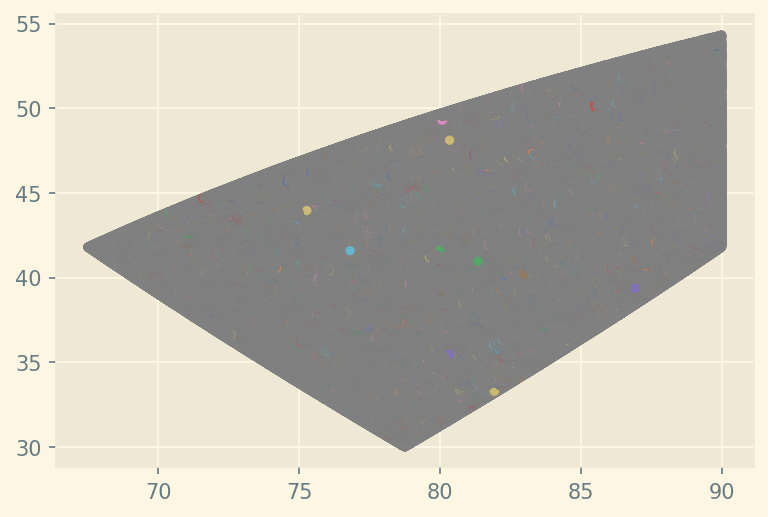

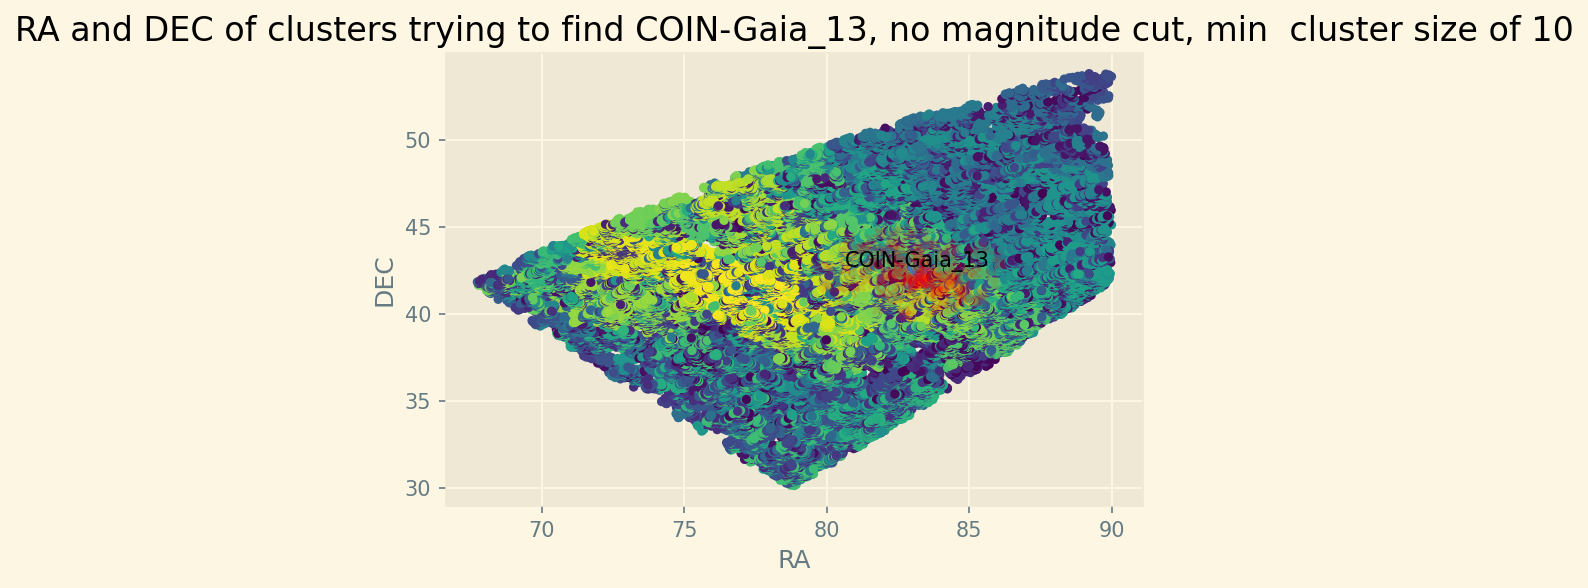

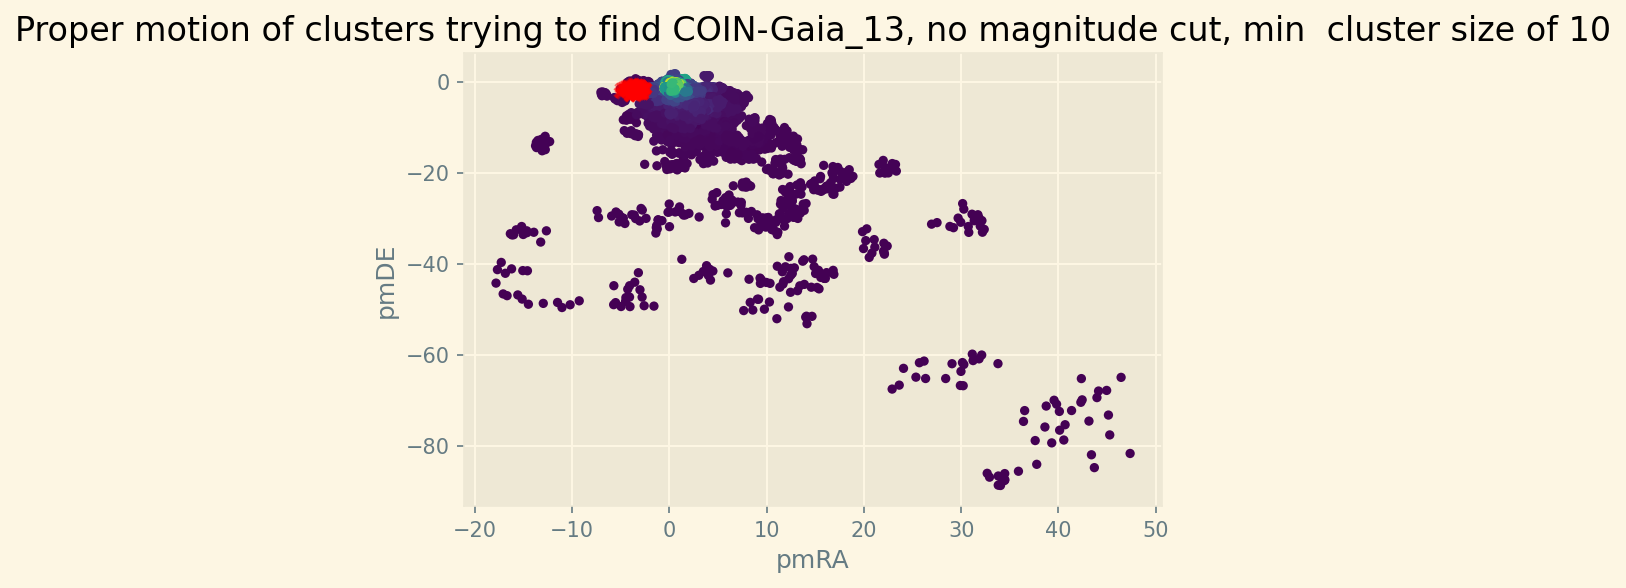

In [141]:
indices_to_keep = np.where(coinclusterer.labels_ != -1)[0]
filtered_df = coinneeded.iloc[indices_to_keep]


color_palette = sns.color_palette('deep', coinclusterer.labels_.max() + 1)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in coinclusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, coinclusterer.probabilities_)]
plt.scatter(coinneeded['ra'], coinneeded['dec'], s=20, linewidth=0, c=cluster_colors )
plt.show()

plt.scatter(filtered_df['ra'], filtered_df['dec'], s=20, linewidth=0, c=coinclusterer.labels_[indices_to_keep] )
plt.scatter(83.186, 42.087, marker = 'x', s = 100)
plt.annotate('COIN-Gaia_13', (83.186, 42.087), textcoords="offset points", xytext=(0,5), ha='center')
plt.scatter(COINmembers['RAdeg'], COINmembers['DEdeg'],marker= 'x', s=20, c='red', alpha=0.1)
plt.title('RA and DEC of clusters trying to find COIN-Gaia_13, no magnitude cut, min  cluster size of 10')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('Data\\COINclusters.pdf')
plt.show()

plt.scatter(filtered_df['pmra'], filtered_df['pmdec'], s=20, linewidth=0, c=coinclusterer.labels_[indices_to_keep] )
plt.scatter(COINmembers['pmRA'], COINmembers['pmDE'],marker= 'x', s=20, c='red', alpha=0.5)
plt.title('Proper motion of clusters trying to find COIN-Gaia_13, no magnitude cut, min  cluster size of 10')
plt.xlabel('pmRA')
plt.ylabel('pmDE')
plt.savefig('Data\\COINclustersPM.pdf')
plt.show()

In [159]:
coindata12 = coindata[coindata['phot_g_mean_mag'] <= 12]

coin12needed = coindata12[['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'source_id']]
coin12needed = coin12needed.dropna()

coin12clusterer = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_method='leaf', min_samples=10).fit(coindata12[['ra', 'dec', 'parallax', 'pmra', 'pmdec']].dropna())

print(coin12clusterer.labels_.max() + 1)

coin12needed['clusternumber'] = coin12clusterer.labels_

43


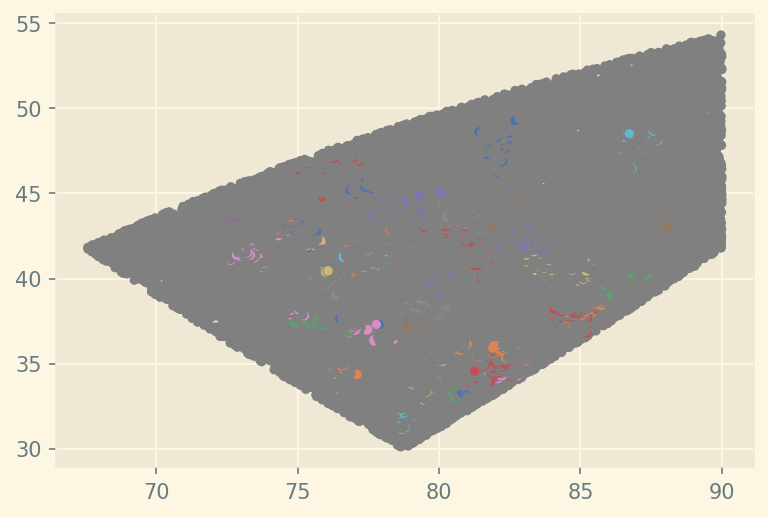

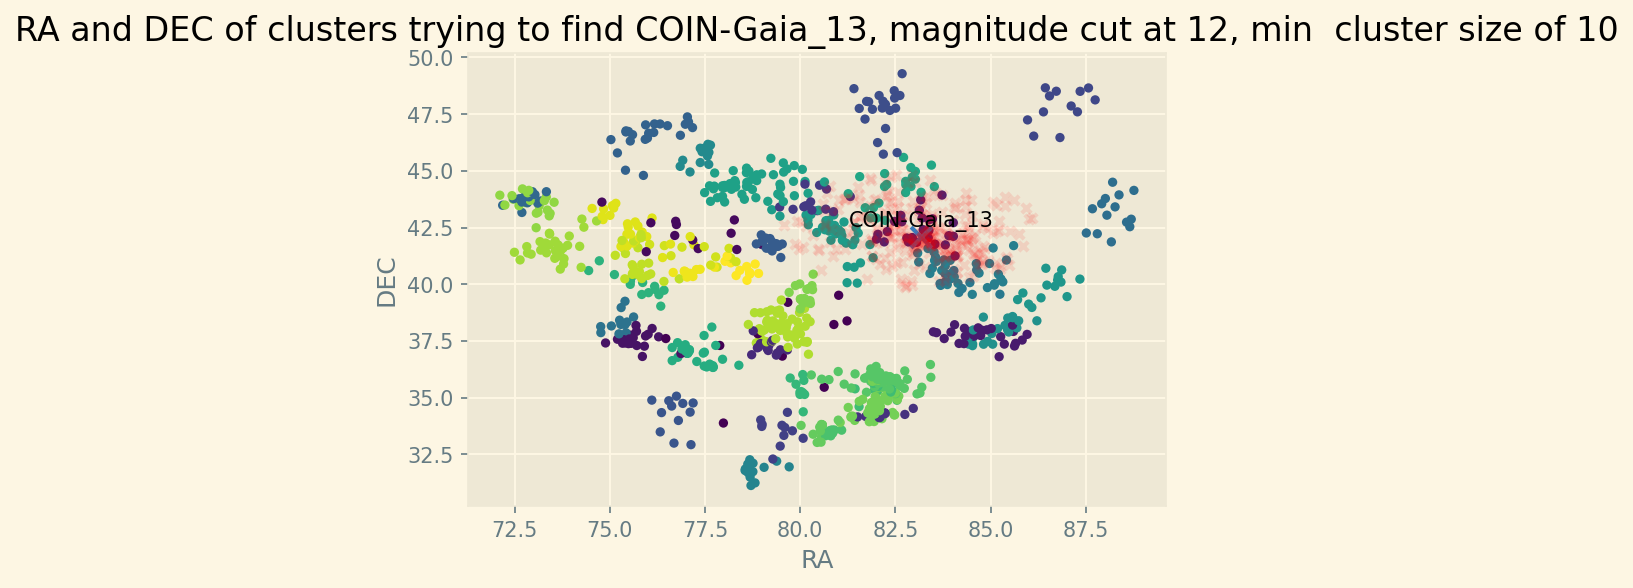

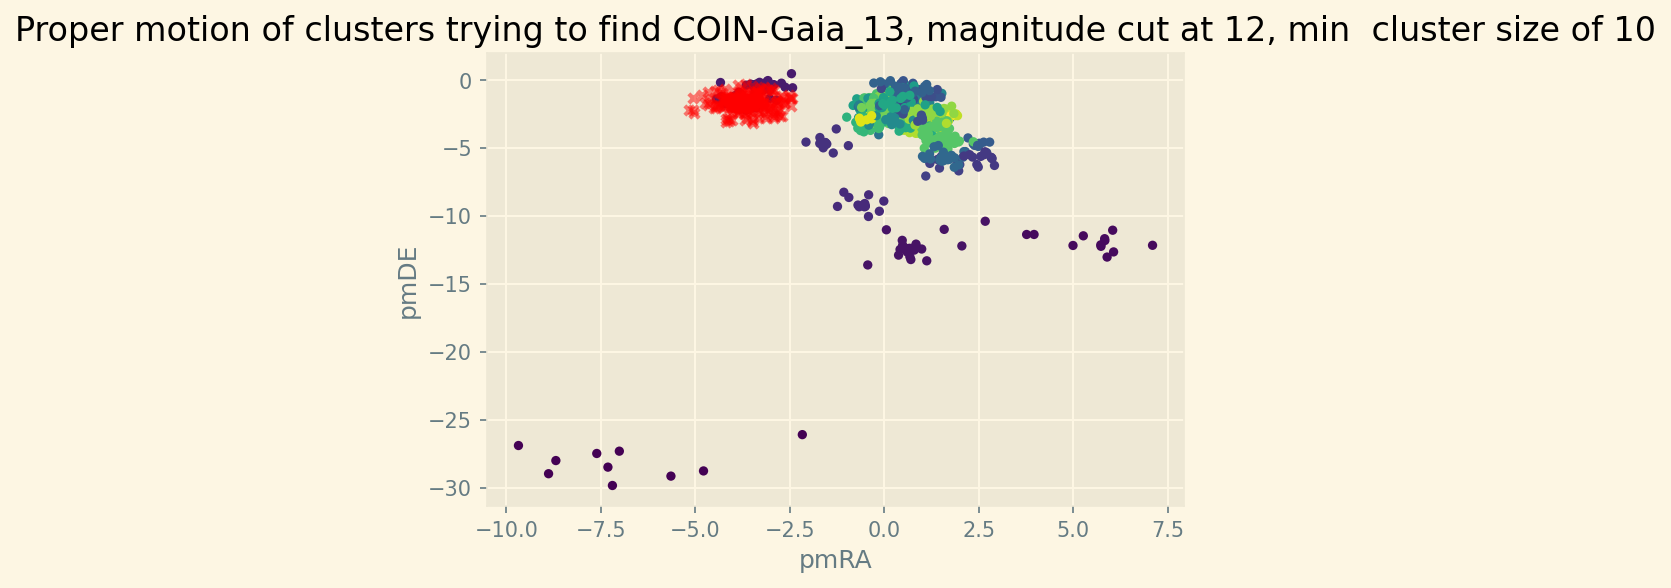

In [160]:
indices_to_keep = np.where(coin12clusterer.labels_ != -1)[0]
filtered_df = coin12needed.iloc[indices_to_keep]



color_palette = sns.color_palette('deep', coin12clusterer.labels_.max() + 1)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in coin12clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, coin12clusterer.probabilities_)]
plt.scatter(coin12needed['ra'], coin12needed['dec'], s=20, linewidth=0, c=cluster_colors )
plt.show()

plt.scatter(filtered_df['ra'], filtered_df['dec'], s=20, linewidth=0, c=coin12clusterer.labels_[indices_to_keep] )
plt.scatter(83.186, 42.087, marker = 'x', s = 100)
plt.annotate('COIN-Gaia_13', (83.186, 42.087), textcoords="offset points", xytext=(0,5), ha='center')
plt.scatter(COINmembers['RAdeg'], COINmembers['DEdeg'],marker= 'x', s=20, c='red', alpha=0.1)
plt.title('RA and DEC of clusters trying to find COIN-Gaia_13, magnitude cut at 12, min  cluster size of 10')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('Data\\COINclusters12.pdf')
plt.show()


plt.scatter(filtered_df['pmra'], filtered_df['pmdec'], s=20, linewidth=0, c=coin12clusterer.labels_[indices_to_keep] )
plt.scatter(COINmembers['pmRA'], COINmembers['pmDE'],marker= 'x', s=20, c='red', alpha=0.5)
plt.title('Proper motion of clusters trying to find COIN-Gaia_13, magnitude cut at 12, min  cluster size of 10')
plt.xlabel('pmRA')
plt.ylabel('pmDE')
plt.savefig('Data\\COINclustersPM12.pdf')
plt.show()


,RAdeg,DEdeg,Source,GLON,GLAT,parallax_x,e_Plx,pmRA,e_pmRA,pmDE,...,BP-RP,Proba,Cluster,ra,dec,parallax_y,pmra,pmdec,source_id,clusternumber
0,83.538520,41.767290,194440939089313024,167.870844,4.824743,1.626288,0.054582,-4.270915,0.083025,-1.998807,...,0.253371,0.92,COIN-Gaia_13,83.538520,41.767290,1.921250,-4.027664,-1.682868,194440939089313024,4
1,83.059241,41.846069,194452758839385600,167.610645,4.566699,2.357356,0.069815,-3.514104,0.096067,-2.311318,...,0.230180,0.34,COIN-Gaia_13,83.059240,41.846068,2.633602,-3.656344,-2.211098,194452758839385600,4
2,83.811764,41.736007,194412798463867904,168.007181,4.979925,1.823844,0.050545,-3.764823,0.109135,-1.118446,...,0.086513,0.41,COIN-Gaia_13,83.811763,41.736006,2.009353,-3.843775,-0.894901,194412798463867904,4
3,83.364926,42.049391,194461245694646912,167.562483,4.867906,1.934917,0.039989,-3.963403,0.068597,-1.420282,...,0.653546,0.72,COIN-Gaia_13,83.364925,42.049391,1.999436,-4.047684,-1.472801,194461245694646912,4
4,83.905895,42.139526,194472343886892416,167.702507,5.254958,1.916014,0.049051,-3.514469,0.085850,-1.653022,...,0.478699,0.76,COIN-Gaia_13,83.905895,42.139525,1.862660,-3.534661,-1.590888,194472343886892416,4
5,84.024228,42.112825,194474229379139584,167.772228,5.314921,1.695219,0.074584,-3.908410,0.110046,-2.064497,...,0.025147,0.92,COIN-Gaia_13,84.024228,42.112825,2.018777,-4.017365,-1.686233,194474229379139584,4
6,82.844194,41.863932,194549996899936384,167.508277,4.441958,2.072342,0.070128,-3.936024,0.104891,-1.490274,...,0.210335,0.68,COIN-Gaia_13,82.844193,41.863931,2.275379,-3.942311,-1.147868,194549996899936384,4
7,82.207185,41.866444,194582535571901312,167.245737,4.046353,1.896318,0.067884,-3.763876,0.112329,-1.807073,...,0.243883,0.97,COIN-Gaia_13,82.207184,41.866444,1.975565,-3.936922,-1.827520,194582535571901312,4
8,82.005075,41.989508,194600952391328256,167.059707,3.988752,1.813917,0.049671,-3.629921,0.079678,-1.694461,...,0.399233,0.97,COIN-Gaia_13,82.005074,41.989508,1.891987,-3.949293,-1.664022,194600952391328256,4
9,82.945542,42.058430,194657882180364544,167.385680,4.610993,1.790065,0.068013,-3.934066,0.104301,-1.886877,...,0.345162,0.99,COIN-Gaia_13,82.945542,42.058430,1.927350,-3.971346,-1.696745,194657882180364544,4


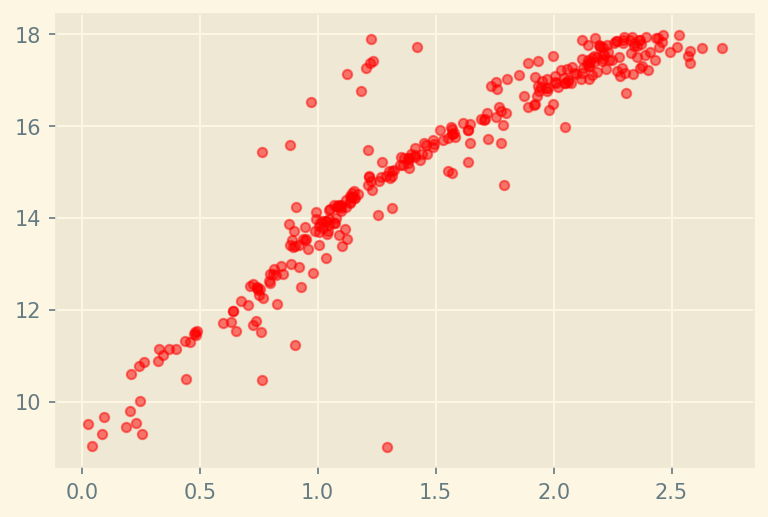

In [161]:


plt.scatter(COINmembers['BP-RP'], COINmembers['Gmag'], s=20, c='red', alpha=0.5)

merged = pd.merge(COINmembers, filtered_df, left_on='Source', right_on='source_id', how='inner')
# COINmembers.columns
# merged.query('phot_g_mean_mag <= 12')

merged

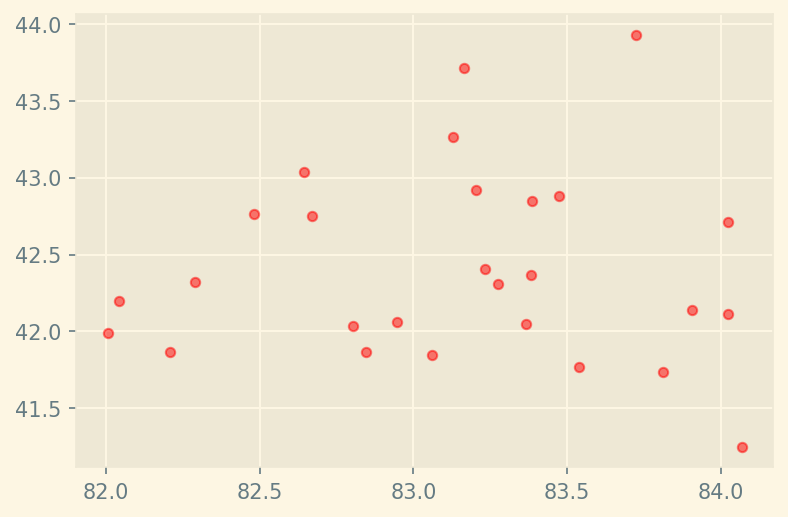

In [165]:
coincandidate = filtered_df.query('clusternumber ==4')
len(coincandidate)

plt.scatter(coincandidate['ra'], coincandidate['dec'], s=20, c='red', alpha=0.5)

#
''' so we find an overdensity which kind of corresponds with the cluster. how many conbtaminants do we find? change the magnitude limit, and see how it changes. 
more faint in magnitude, more diluted cluster, see at different magnitude to how many clusters the cluster is assigned to.
argument as completeness, purity and contamination. see if the purity of the cluster depends on density of stars (stars / square degree) i.e. the magnitude of the stars.'''

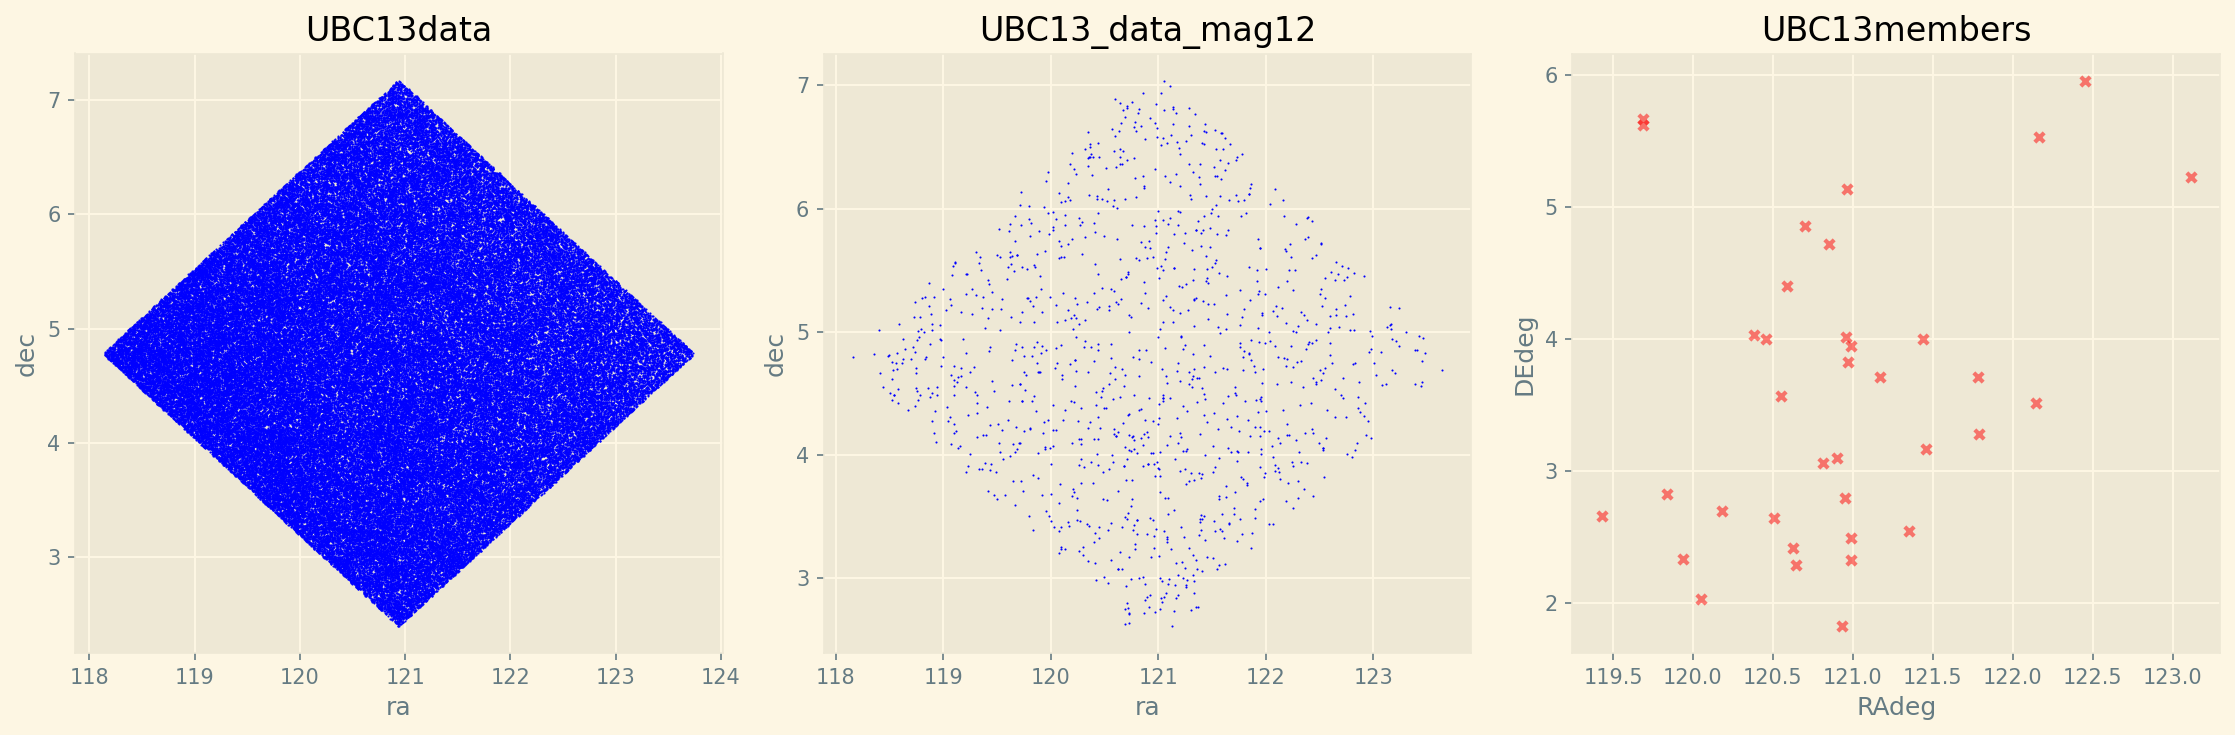

In [217]:
UBC13members = members[members['Cluster'] == 'UBC_13']
UBC13data = pd.read_csv('Data\\UBC13.csv')

UBC13_data_mag12 =UBC13data[UBC13data['phot_g_mean_mag'] <= 12]


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First subplot
axs[0].scatter(UBC13data['ra'], UBC13data['dec'], s=1, linewidth=0, c='blue')
axs[0].set_title('UBC13data')
axs[0].set_xlabel('ra')
axs[0].set_ylabel('dec')

# Second subplot
axs[1].scatter(UBC13_data_mag12['ra'], UBC13_data_mag12['dec'], s=1, linewidth=0, c='blue')
axs[1].set_title('UBC13_data_mag12')
axs[1].set_xlabel('ra')
axs[1].set_ylabel('dec')

# Third subplot
axs[2].scatter(UBC13members['RAdeg'], UBC13members['DEdeg'],marker= 'x', s=20, c='red', alpha=0.5)
axs[2].set_title('UBC13members')
axs[2].set_xlabel('RAdeg')
axs[2].set_ylabel('DEdeg')

plt.tight_layout()
plt.show()




In [218]:
#cluster the data
UBC13needed = UBC13_data_mag12[['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'source_id']]
UBC13needed = UBC13needed.dropna()

UBC13_cluster_prep = UBC13needed[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]


UBC13_clusters_mag12 = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_method='leaf', min_samples=10).fit(UBC13_cluster_prep)

print(UBC13_clusters_mag12.labels_.max() + 1)

UBC13needed['clusternumber'] = UBC13_clusters_mag12.labels_ # add the cluster number to the dataframe


2


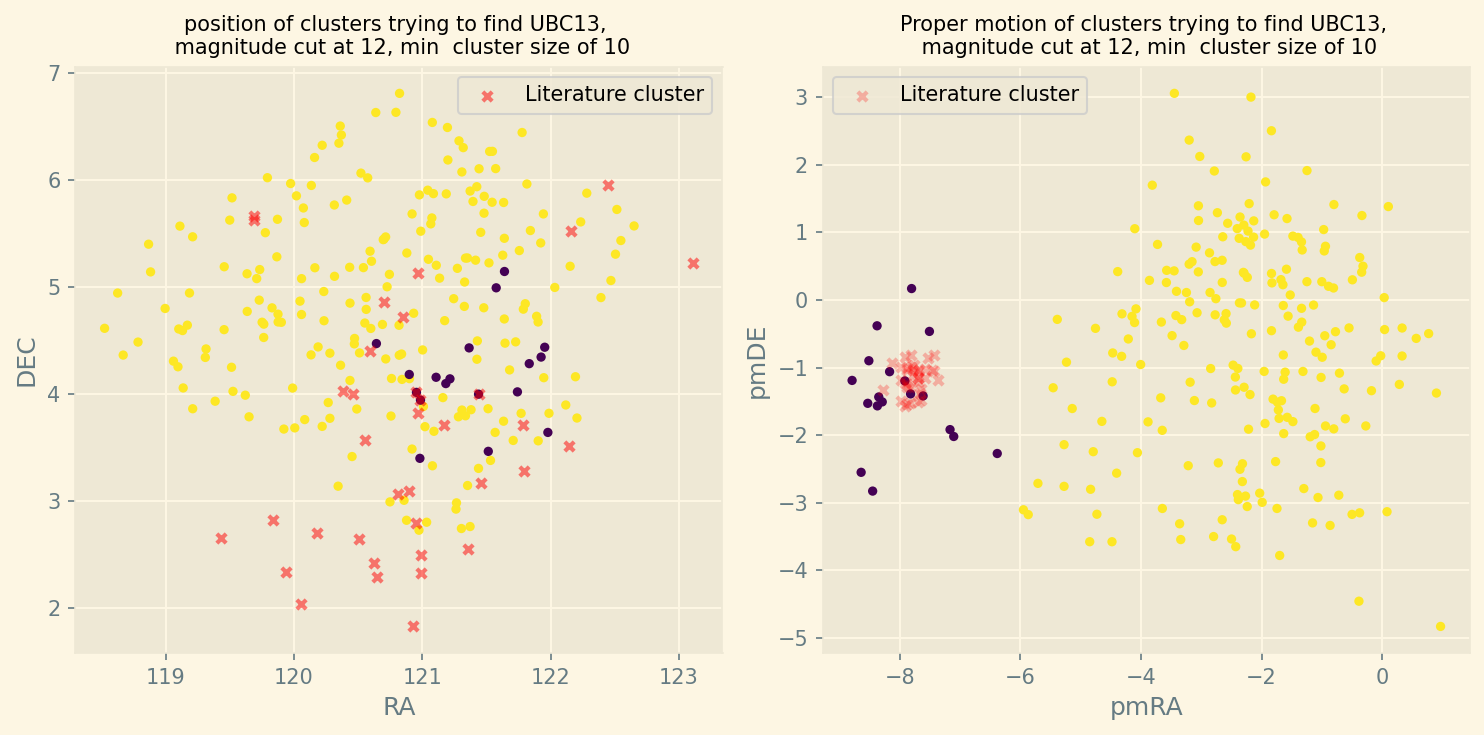

In [219]:
#plot the positions and proper motions of the clusters
indices_to_keep = np.where(UBC13_clusters_mag12.labels_ != -1)[0]
UBC13_clusters_mag12_isolated = UBC13needed.iloc[indices_to_keep]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
axs[0].scatter(UBC13_clusters_mag12_isolated['ra'], UBC13_clusters_mag12_isolated['dec'], s=20, linewidth=0, c=UBC13_clusters_mag12.labels_[indices_to_keep])
axs[0].scatter(UBC13members['RAdeg'], UBC13members['DEdeg'],marker= 'x', s=20, c='red', alpha=0.5, label='Literature cluster')
axs[0].set_title('position of clusters trying to find UBC13, \n magnitude cut at 12, min  cluster size of 10', fontsize = 10)
axs[0].legend()
axs[0].set_xlabel('RA')
axs[0].set_ylabel('DEC')

# Second subplot
axs[1].scatter(UBC13_clusters_mag12_isolated['pmra'], UBC13_clusters_mag12_isolated['pmdec'], s=20, linewidth=0, c=UBC13_clusters_mag12.labels_[indices_to_keep])
axs[1].scatter(UBC13members['pmRA'], UBC13members['pmDE'],marker= 'x', s=20, c='red', alpha=0.25, label='Literature cluster')
axs[1].set_title('Proper motion of clusters trying to find UBC13, \n magnitude cut at 12, min  cluster size of 10', fontsize=10)
axs[1].legend()
axs[1].set_xlabel('pmRA')
axs[1].set_ylabel('pmDE')

plt.tight_layout()
plt.savefig('Data\\UBC13_clusters_mag12.pdf')
plt.show()


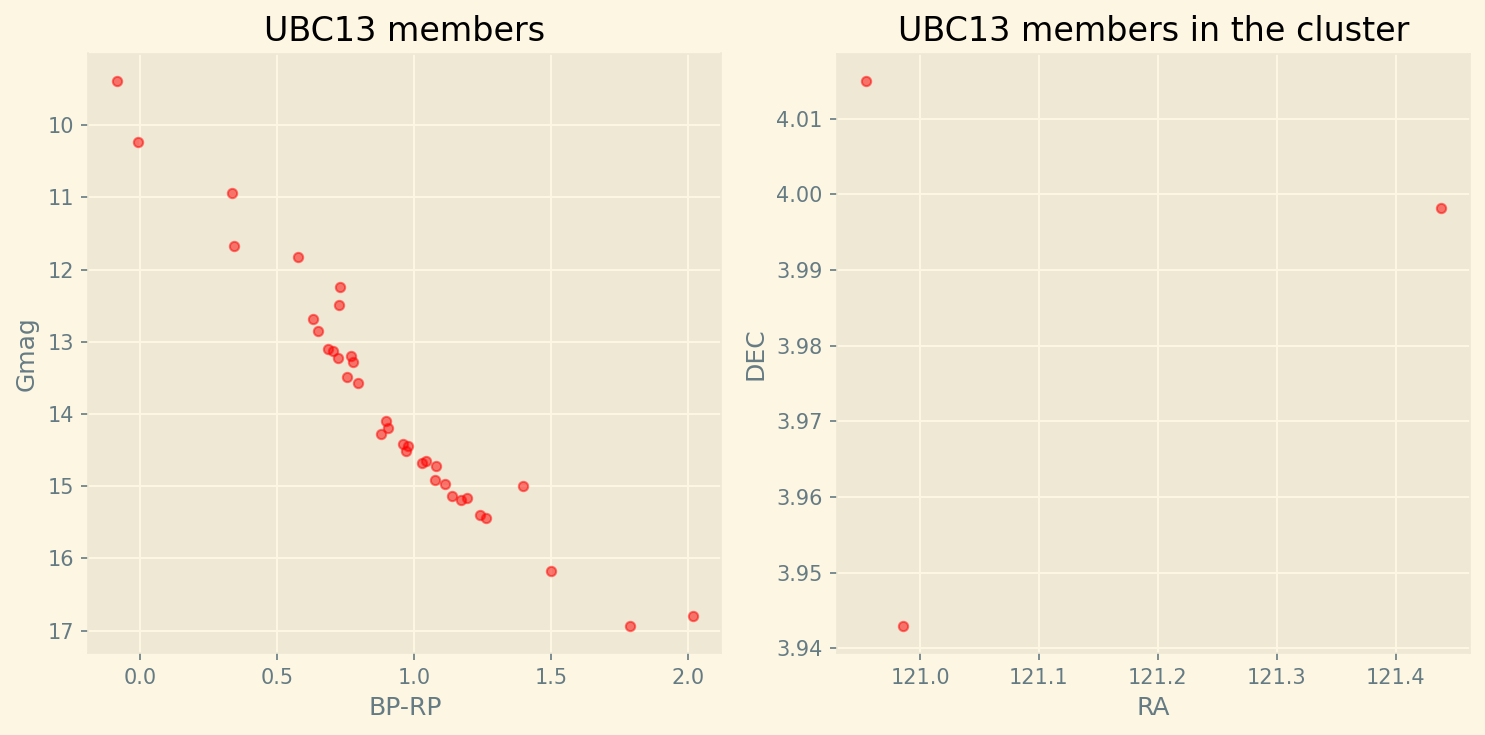

18
for UBC13, with a magnitude cut at 12, the purity is 0.16666666666666666 and the completeness is 0.08333333333333333


In [220]:
#find completeness and purity of the cluster

UBC13_merge_mag12 = pd.merge(UBC13members, UBC13_clusters_mag12_isolated, left_on='Source', right_on='source_id', how='inner')
UBC13_merge_mag12

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
axs[0].scatter(UBC13members['BP-RP'], UBC13members['Gmag'], s=20, c='red', alpha=0.5)
axs[0].invert_yaxis()
axs[0].set_title('UBC13 members')
axs[0].set_xlabel('BP-RP')
axs[0].set_ylabel('Gmag')

# Second subplot
axs[1].scatter(UBC13_merge_mag12['ra'], UBC13_merge_mag12['dec'], s=20, c='red', alpha=0.5)
axs[1].set_title('UBC13 members in the cluster')
axs[1].set_xlabel('RA')
axs[1].set_ylabel('DEC')

plt.tight_layout()
plt.show()

UBC13_candidates_mag12 = UBC13_clusters_mag12_isolated.query('clusternumber == 0')
print(len(UBC13_candidates_mag12))
UBC13_merge_mag12

UBC13_purity_mag12 = len(UBC13_merge_mag12) / len(UBC13_candidates_mag12)
UBC13_completeness_mag12 = len(UBC13_merge_mag12) / len(UBC13members)

print(f'for UBC13, with a magnitude cut at 12, the purity is {UBC13_purity_mag12} and the completeness is {UBC13_completeness_mag12}')




Now i will do the same thing for no magnitude cut as i dont have time to slowely increase the cut before the presentation.

In [221]:
#cluster the data
UBC13needed = UBC13data[['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'source_id']]
UBC13needed = UBC13needed.dropna()

UBC13_cluster_prep = UBC13needed[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]


UBC13_clusters = hdbscan.HDBSCAN(min_cluster_size=20, cluster_selection_method='leaf', min_samples=10).fit(UBC13_cluster_prep)

print(UBC13_clusters.labels_.max() + 1)

UBC13needed['clusternumber'] = UBC13_clusters.labels_ # add the cluster number to the dataframe

40


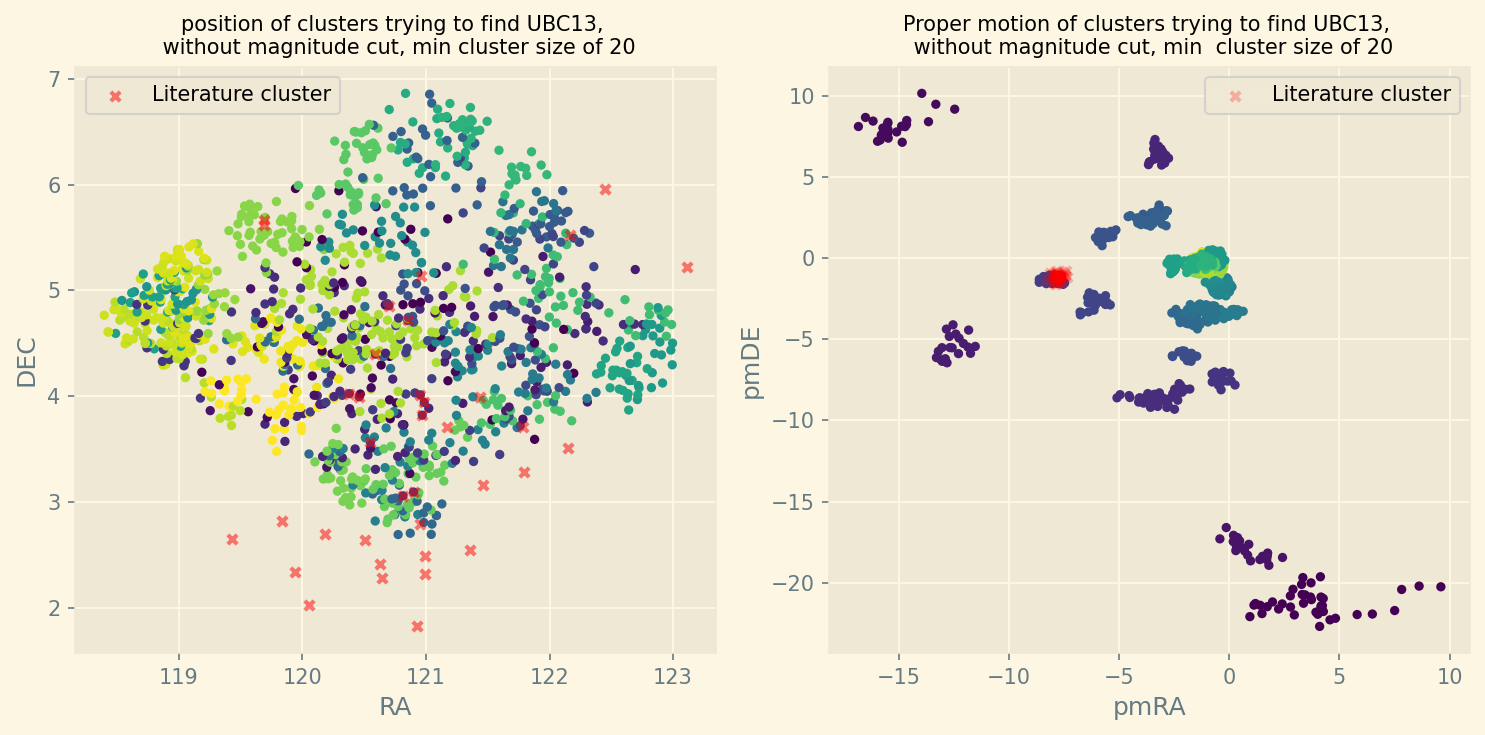

In [226]:
#plot the positions and proper motions of the clusters
indices_to_keep = np.where(UBC13_clusters.labels_ != -1)[0]
UBC13_clusters_isolated = UBC13needed.iloc[indices_to_keep]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
axs[0].scatter(UBC13_clusters_isolated['ra'], UBC13_clusters_isolated['dec'], s=20, linewidth=0, c=UBC13_clusters.labels_[indices_to_keep])
axs[0].scatter(UBC13members['RAdeg'], UBC13members['DEdeg'],marker= 'x', s=20, c='red', alpha=0.5, label='Literature cluster')
axs[0].set_title('position of clusters trying to find UBC13, \n without magnitude cut, min cluster size of 20', fontsize = 10)
axs[0].legend()
axs[0].set_xlabel('RA')
axs[0].set_ylabel('DEC')

# Second subplot
axs[1].scatter(UBC13_clusters_isolated['pmra'], UBC13_clusters_isolated['pmdec'], s=20, linewidth=0, c=UBC13_clusters.labels_[indices_to_keep])
axs[1].scatter(UBC13members['pmRA'], UBC13members['pmDE'],marker= 'x', s=20, c='red', alpha=0.25, label='Literature cluster')
axs[1].set_title('Proper motion of clusters trying to find UBC13, \n without magnitude cut, min  cluster size of 20', fontsize=10)
axs[1].legend()
axs[1].set_xlabel('pmRA')
axs[1].set_ylabel('pmDE')

plt.tight_layout()
plt.savefig('Data\\UBC13_clusters.pdf')
plt.show()


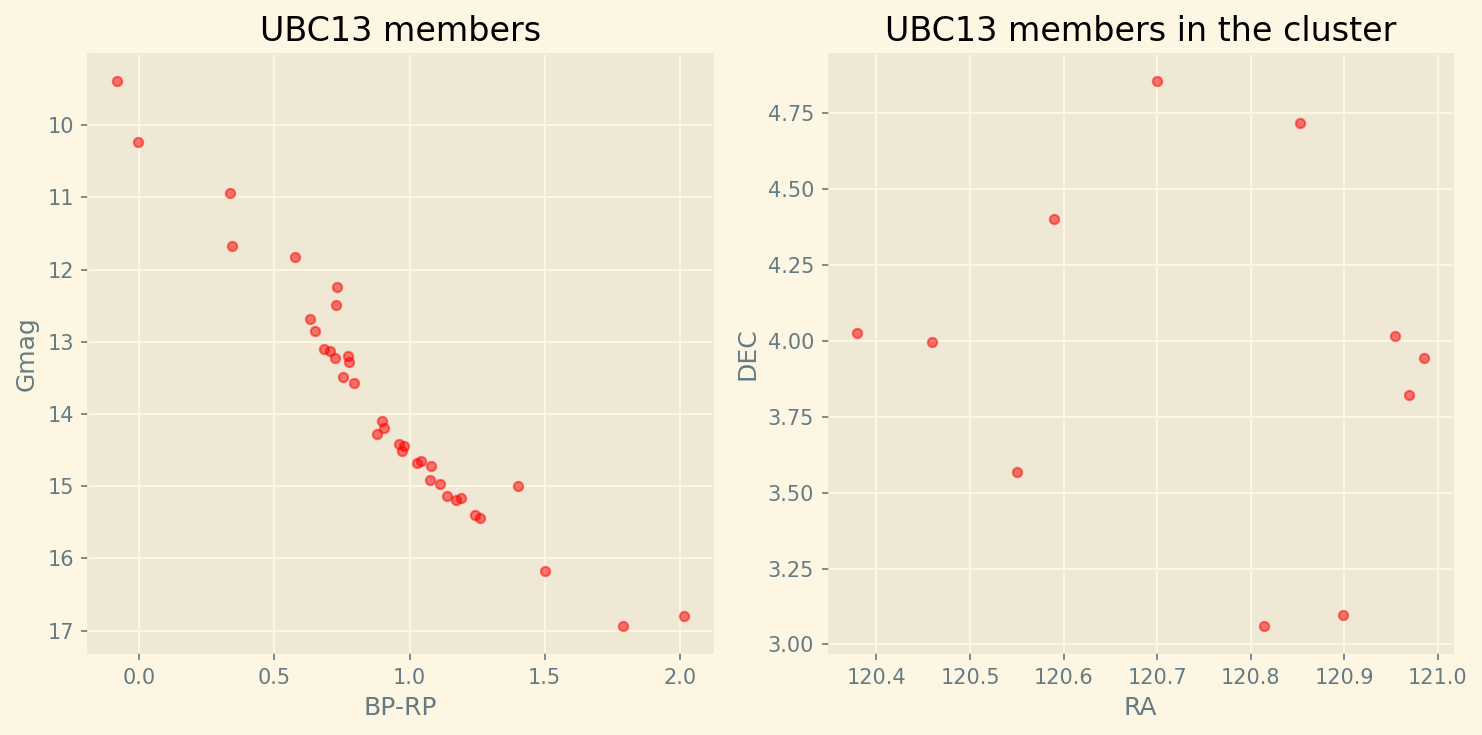

40
for UBC13, without a magnitude cut, the purity is 0.275 and the completeness is 0.3055555555555556


In [222]:
#find completeness and purity of the cluster

UBC13_merge = pd.merge(UBC13members, UBC13_clusters_isolated, left_on='Source', right_on='source_id', how='inner')
UBC13_merge

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
axs[0].scatter(UBC13members['BP-RP'], UBC13members['Gmag'], s=20, c='red', alpha=0.5)
axs[0].invert_yaxis()
axs[0].set_title('UBC13 members')
axs[0].set_xlabel('BP-RP')
axs[0].set_ylabel('Gmag')

# Second subplot
axs[1].scatter(UBC13_merge['ra'], UBC13_merge['dec'], s=20, c='red', alpha=0.5)
axs[1].set_title('UBC13 members in the cluster')
axs[1].set_xlabel('RA')
axs[1].set_ylabel('DEC')

plt.tight_layout()
plt.show()

UBC13_candidates = UBC13_clusters_isolated.query('clusternumber == 0')
print(len(UBC13_candidates))
UBC13_merge

UBC13_purity = len(UBC13_merge) / len(UBC13_candidates)
UBC13_completeness = len(UBC13_merge) / len(UBC13members)

print(f'for UBC13, without a magnitude cut, the purity is {UBC13_purity} and the completeness is {UBC13_completeness}')


Now I will put all of this into a function


In [227]:
def HDBSCAN(data, minsize):
    data_needed = data[['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'source_id']].dropna()
    HDBprep = data_needed[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
    clusterer = hdbscan.HDBSCAN(min_cluster_size=minsize, cluster_selection_method='leaf', min_samples=10).fit(HDBprep)
    data_needed['clusternumber'] = clusterer.labels_
    clusteramount = clusterer.labels_.max() + 1
    return data_needed, clusterer, clusteramount
